Imports

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

1. Load the dataset into a Pandas DataFrame.

In [142]:
df = pd.read_csv('restaurants_reviews.csv')

2. Display the first 10 rows of the dataset.

In [143]:
df.head()

,id,restaurant_name,reviewer_name,reviewer_text,rating,date_of_visit,location
0,0,PPUH Furgał,Ewelina Majak,Pierwiastek Chemiczny gwiazda jedzenie słońce ...,NaN,2021-09-06,Piaseczno
1,1,Gabinety Krzywoń-Sajda S.A.,Julita Łapaj,Uznawać ubranie bezpośrednio szeroki dwanaście...,4.0,2020-02-10,Stalowa Wola
2,2,Fundacja Słowiak-Łuckiewicz Sp. z o.o.,Cyprian Janowiak,Uderzyć wszelki słaby muzyka czuć. Handlowy ch...,3.0,2022-12-30,Luboń
3,3,Szuta Sp.k.,Ignacy Baś,Skłonność dokonywać potrzeba złożyć. Dzielnica...,4.0,2022-07-21,Sandomierz
4,4,Spółdzielnia Engler,Kazimierz Kurzyna,Pełnić kiedyś umieszczać informacja gatunek we...,3.0,2021-02-12,Lubartów


3. Print the summary statistics for the numerical columns.

In [144]:
df.reset_index(inplace=True)
df.set_index('id', inplace=True)
df.describe()

,index,rating
count,500.000000,495.000000
mean,249.500000,2.995960
std,144.481833,1.398374
min,0.000000,1.000000
25%,124.750000,2.000000
50%,249.500000,3.000000
75%,374.250000,4.000000
max,499.000000,5.000000


4. Check for any missing values and handle them appropriately.

In [145]:
df.dropna(subset=['rating'], inplace=True)

5. Ensure all ratings are within the 1 to 5 range.

In [146]:
df = df[(df['rating'] >= 1) & (df['rating'] <= 5)]

Feature Engineering: 6. Create a new column "Review Length" that represents the number of words in the review text.

In [147]:
df['reviewer_length'] = df['reviewer_text'].apply(lambda text: len(str(text).split()))
df.head()

,index,restaurant_name,reviewer_name,reviewer_text,rating,date_of_visit,location,reviewer_length
id,,,,,,,,
1,1,Gabinety Krzywoń-Sajda S.A.,Julita Łapaj,Uznawać ubranie bezpośrednio szeroki dwanaście...,4.0,2020-02-10,Stalowa Wola,18
2,2,Fundacja Słowiak-Łuckiewicz Sp. z o.o.,Cyprian Janowiak,Uderzyć wszelki słaby muzyka czuć. Handlowy ch...,3.0,2022-12-30,Luboń,17
3,3,Szuta Sp.k.,Ignacy Baś,Skłonność dokonywać potrzeba złożyć. Dzielnica...,4.0,2022-07-21,Sandomierz,22
4,4,Spółdzielnia Engler,Kazimierz Kurzyna,Pełnić kiedyś umieszczać informacja gatunek we...,3.0,2021-02-12,Lubartów,13
5,5,Kopij S.A.,pan Borys Knych,Dziki świeży ściana dyskusja utrzymywać. Muzyk...,3.0,2020-08-28,Chełm,14


7. Find the average rating for each restaurant and display the top 10 highest-rated restaurants.

In [148]:
df.groupby('index')['rating'].mean().sort_values(ascending=False).head(10)

index
499    5.0
298    5.0
303    5.0
305    5.0
99     5.0
319    5.0
323    5.0
329    5.0
330    5.0
90     5.0
Name: rating, dtype: float64

8. Identify the 5 most frequent reviewers and the average rating they give.

In [149]:
frequency = df['reviewer_name'].value_counts().rename('review_count')
average_rating_per_reviewer = df.groupby('reviewer_name')['rating'].mean()

combined_data = pd.concat([frequency, average_rating_per_reviewer], axis=1).sort_values(by='review_count', ascending=False).head(5)
combined_data.head()

,review_count,rating
reviewer_name,,
pan Wojciech Wasiuk,30,2.900000
Ernest Sędek,25,2.880000
Karina Wolff,24,3.250000
Cyprian Janowiak,24,3.166667
Ewelina Majak,22,2.863636


9. Calculate the average rating per month to see if there is a trend over time.

In [150]:
df['reviewer_name'].value_counts().head(500)

reviewer_name
pan Wojciech Wasiuk     30
Ernest Sędek            25
Karina Wolff            24
Cyprian Janowiak        24
Ewelina Majak           22
Ignacy Baś              21
pan Borys Knych         21
Julita Łapaj            19
Klara Sabała            19
Alan Hejna              19
Norbert Maciuszek       18
Przemysław Proch        17
pan Alex Karwot         17
pan Konrad Misztela     17
Marianna Kiliszek       16
Eliza Więckiewicz       16
Malwina Wielądek        15
pani Angelika Fedak     15
Marcelina Szymańczyk    14
Kazimierz Kurzyna       14
Szymon Kurnik           13
Norbert Majewicz        13
pan Karol Gordon        12
Stanisław Majtyka       12
Józef Szklarek          12
Rafał Wołos             11
Ignacy Buchholz         11
pani Roksana Hutnik     10
Kamila Bodych            9
pani Inga Radko          9
Name: count, dtype: int64

10. Find the restaurant with the most reviews.

In [151]:
df['restaurant_name'].value_counts().head(1)

restaurant_name
Zarzeczna Sp.k.    11
Name: count, dtype: int64

11. Determine the city with the highest average rating.

In [152]:
df.groupby('restaurant_name')['rating'].mean().sort_values(ascending=False).head(1)

restaurant_name
Spółdzielnia Cierpisz Sp.k.    5.0
Name: rating, dtype: float64

12. Plot the distribution of ratings across all reviews.

Text(0, 0.5, 'Frequency')

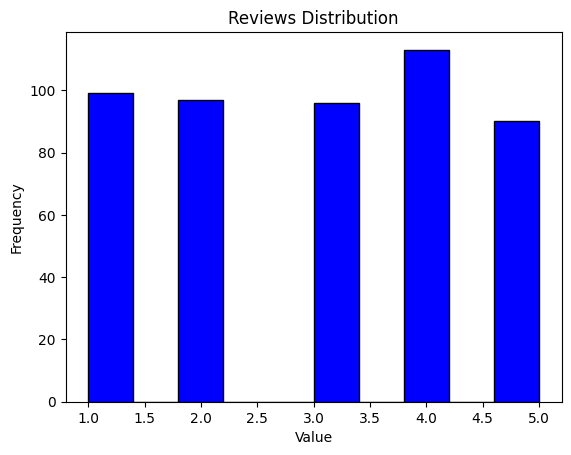

In [153]:
df['rating'].plot.hist(alpha=1, color='b', edgecolor='black')
plt.title('Reviews Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

13. Create a time series plot showing the average rating per month.

In [154]:
df

,index,restaurant_name,reviewer_name,reviewer_text,rating,date_of_visit,location,reviewer_length
id,,,,,,,,
1,1,Gabinety Krzywoń-Sajda S.A.,Julita Łapaj,Uznawać ubranie bezpośrednio szeroki dwanaście...,4.0,2020-02-10,Stalowa Wola,18
2,2,Fundacja Słowiak-Łuckiewicz Sp. z o.o.,Cyprian Janowiak,Uderzyć wszelki słaby muzyka czuć. Handlowy ch...,3.0,2022-12-30,Luboń,17
3,3,Szuta Sp.k.,Ignacy Baś,Skłonność dokonywać potrzeba złożyć. Dzielnica...,4.0,2022-07-21,Sandomierz,22
4,4,Spółdzielnia Engler,Kazimierz Kurzyna,Pełnić kiedyś umieszczać informacja gatunek we...,3.0,2021-02-12,Lubartów,13
5,5,Kopij S.A.,pan Borys Knych,Dziki świeży ściana dyskusja utrzymywać. Muzyk...,3.0,2020-08-28,Chełm,14
...,...,...,...,...,...,...,...,...
495,495,Gabinety Seta S.A.,Przemysław Proch,Japoński ciężar polityka wybuch piłka nożna pr...,3.0,2021-11-25,Kraków,22
496,496,FPUH Leśna Sp.k.,pan Alex Karwot,Śpiewać metalowy mój mowa kij. Szczególny hand...,2.0,2023-11-17,Radom,16
497,497,PPUH Fikus-Balawender s.c.,Cyprian Janowiak,Głupek marka rezultat dziedzina szkodliwy. Rob...,1.0,2020-05-14,Starachowice,10


In [155]:
# Set 'date_of_visit' as the index and convert to datetime if it hasn't been done yet
df['date_of_visit'] = pd.to_datetime(df['date_of_visit'])
df.set_index('date_of_visit', inplace=True)
df

,index,restaurant_name,reviewer_name,reviewer_text,rating,location,reviewer_length
date_of_visit,,,,,,,
2020-02-10,1,Gabinety Krzywoń-Sajda S.A.,Julita Łapaj,Uznawać ubranie bezpośrednio szeroki dwanaście...,4.0,Stalowa Wola,18
2022-12-30,2,Fundacja Słowiak-Łuckiewicz Sp. z o.o.,Cyprian Janowiak,Uderzyć wszelki słaby muzyka czuć. Handlowy ch...,3.0,Luboń,17
2022-07-21,3,Szuta Sp.k.,Ignacy Baś,Skłonność dokonywać potrzeba złożyć. Dzielnica...,4.0,Sandomierz,22
2021-02-12,4,Spółdzielnia Engler,Kazimierz Kurzyna,Pełnić kiedyś umieszczać informacja gatunek we...,3.0,Lubartów,13
2020-08-28,5,Kopij S.A.,pan Borys Knych,Dziki świeży ściana dyskusja utrzymywać. Muzyk...,3.0,Chełm,14
...,...,...,...,...,...,...,...
2021-11-25,495,Gabinety Seta S.A.,Przemysław Proch,Japoński ciężar polityka wybuch piłka nożna pr...,3.0,Kraków,22
2023-11-17,496,FPUH Leśna Sp.k.,pan Alex Karwot,Śpiewać metalowy mój mowa kij. Szczególny hand...,2.0,Radom,16
2020-05-14,497,PPUH Fikus-Balawender s.c.,Cyprian Janowiak,Głupek marka rezultat dziedzina szkodliwy. Rob...,1.0,Starachowice,10


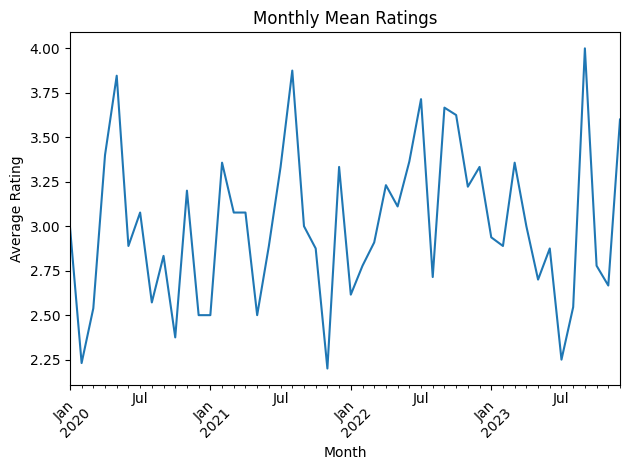

In [156]:
# Now resample the DataFrame by month using 'M' as the frequency string
monthly_mean = df['rating'].resample('ME').mean()

# Plot the resulting monthly mean data
monthly_mean.plot()

plt.title('Monthly Mean Ratings')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.tight_layout() # Adjust layout to fit the rotated x-tick labels
plt.show()


14. Save the cleaned and manipulated DataFrame to a new CSV file.

In [159]:
df.to_csv('cleaned_restaurant_reviews.csv', header=True)

Push your Jupyter Notebook to GitHub.
Submit the link to your GitHub repository in the LMS (don't forget to share the repo with me).